In [1]:
# colab gpu(tpu) 사용
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
%matplotlib inline

In [3]:
def imgshow(img):
  rows = 1
  cols = img.size(0)
  fig = plt.figure()
  for i, image in enumerate(img):
    image = image.squeeze()
    image = image/2+0.5
    image = image.numpy()
    fig.add_subplot(rows,cols,i+1)
    plt.imshow(image, cmap='gray')
  plt.show()

In [4]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
download_root = './MNIST_DATASET'

In [6]:
train_dataset = MNIST(download_root,transform=mnist_transform, train=True, download=True)

Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
num_epochs = 100
batch_size = 128
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

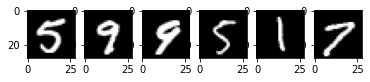

In [9]:
data = next(iter(dataloader))
img = data[0][:6]
imgshow(img)

In [10]:
class autoencoder(nn.Module):
  def __init__(self):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(# c.f. b는 배치 사이즈
        nn.Conv2d(1,16,3,stride=3, padding=1), # (b,16,10,10)
        nn.ReLU(True),
        nn.MaxPool2d(2,stride=2), # (b,16,5,5)
        nn.Conv2d(16,8,3,stride=2,padding=1), # (b,8,3,3)
        nn.ReLU(True),
        nn.MaxPool2d(2,stride=1) #(b,8,2,2)
    )
    self.decoder = nn.Sequential(# convTranspose 는 이미지를 크게 만드는 연산이다. encoder와 다르게 pooling은 하지 않는다.
        nn.ConvTranspose2d(8,16,3,stride=2), # (b,16,5,5)
        nn.ReLU(True),
        nn.ConvTranspose2d(16,8,5,stride=3,padding=1), # (b,8,15,15)
        nn.ReLU(True),
        nn.ConvTranspose2d(8,1,2,stride=2,padding=1), # (b,1,28,28)
        nn.Tanh()
    )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [16]:
def evaluate(data):
  model.eval()
  with torch.no_grad():
    img = data[0][:6]
    img = img.to(device)
    img = model(img)
    img = img.to('cpu')
    imgshow(img)

In [12]:
model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)
data = next(iter(dataloader)) # evaluate 하기 위한 데이터

epoch[ 1 / 100 ], loss:0.2029
epoch[ 2 / 100 ], loss:0.1988
epoch[ 3 / 100 ], loss:0.1752
epoch[ 4 / 100 ], loss:0.1561
epoch[ 5 / 100 ], loss:0.1616
epoch[ 6 / 100 ], loss:0.1446
epoch[ 7 / 100 ], loss:0.1366
epoch[ 8 / 100 ], loss:0.1344
epoch[ 9 / 100 ], loss:0.1308
epoch[ 10 / 100 ], loss:0.1326


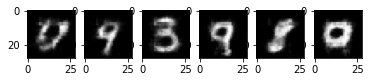

epoch[ 11 / 100 ], loss:0.1201
epoch[ 12 / 100 ], loss:0.1343
epoch[ 13 / 100 ], loss:0.1248
epoch[ 14 / 100 ], loss:0.1272
epoch[ 15 / 100 ], loss:0.1152
epoch[ 16 / 100 ], loss:0.1190
epoch[ 17 / 100 ], loss:0.1240
epoch[ 18 / 100 ], loss:0.1172
epoch[ 19 / 100 ], loss:0.1161
epoch[ 20 / 100 ], loss:0.1140


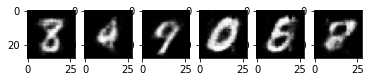

epoch[ 21 / 100 ], loss:0.1155
epoch[ 22 / 100 ], loss:0.1087
epoch[ 23 / 100 ], loss:0.1108
epoch[ 24 / 100 ], loss:0.1077
epoch[ 25 / 100 ], loss:0.1188
epoch[ 26 / 100 ], loss:0.1081
epoch[ 27 / 100 ], loss:0.1120
epoch[ 28 / 100 ], loss:0.1120
epoch[ 29 / 100 ], loss:0.1105
epoch[ 30 / 100 ], loss:0.1166


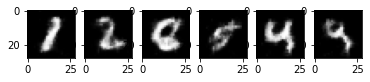

epoch[ 31 / 100 ], loss:0.1045
epoch[ 32 / 100 ], loss:0.1069
epoch[ 33 / 100 ], loss:0.1125
epoch[ 34 / 100 ], loss:0.1046
epoch[ 35 / 100 ], loss:0.1126
epoch[ 36 / 100 ], loss:0.1028
epoch[ 37 / 100 ], loss:0.1136
epoch[ 38 / 100 ], loss:0.1101
epoch[ 39 / 100 ], loss:0.1087
epoch[ 40 / 100 ], loss:0.1115


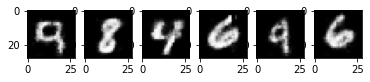

epoch[ 41 / 100 ], loss:0.1044
epoch[ 42 / 100 ], loss:0.1107
epoch[ 43 / 100 ], loss:0.1112
epoch[ 44 / 100 ], loss:0.1136
epoch[ 45 / 100 ], loss:0.1118
epoch[ 46 / 100 ], loss:0.1135
epoch[ 47 / 100 ], loss:0.1095
epoch[ 48 / 100 ], loss:0.1079
epoch[ 49 / 100 ], loss:0.1066
epoch[ 50 / 100 ], loss:0.1138


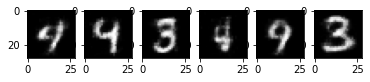

epoch[ 51 / 100 ], loss:0.1105
epoch[ 52 / 100 ], loss:0.1091
epoch[ 53 / 100 ], loss:0.1124
epoch[ 54 / 100 ], loss:0.1003
epoch[ 55 / 100 ], loss:0.1144
epoch[ 56 / 100 ], loss:0.1067
epoch[ 57 / 100 ], loss:0.1022
epoch[ 58 / 100 ], loss:0.1021
epoch[ 59 / 100 ], loss:0.1078
epoch[ 60 / 100 ], loss:0.1067


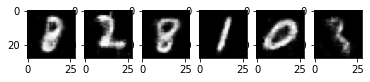

epoch[ 61 / 100 ], loss:0.1122
epoch[ 62 / 100 ], loss:0.1144
epoch[ 63 / 100 ], loss:0.1088
epoch[ 64 / 100 ], loss:0.1036
epoch[ 65 / 100 ], loss:0.1047
epoch[ 66 / 100 ], loss:0.1075
epoch[ 67 / 100 ], loss:0.1097
epoch[ 68 / 100 ], loss:0.1159
epoch[ 69 / 100 ], loss:0.1048
epoch[ 70 / 100 ], loss:0.1159


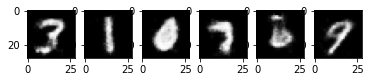

epoch[ 71 / 100 ], loss:0.1044
epoch[ 72 / 100 ], loss:0.1070
epoch[ 73 / 100 ], loss:0.1080
epoch[ 74 / 100 ], loss:0.0952
epoch[ 75 / 100 ], loss:0.0979
epoch[ 76 / 100 ], loss:0.1070
epoch[ 77 / 100 ], loss:0.1078
epoch[ 78 / 100 ], loss:0.1053
epoch[ 79 / 100 ], loss:0.1124
epoch[ 80 / 100 ], loss:0.1067


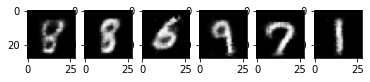

epoch[ 81 / 100 ], loss:0.1001
epoch[ 82 / 100 ], loss:0.1124
epoch[ 83 / 100 ], loss:0.0973
epoch[ 84 / 100 ], loss:0.1039
epoch[ 85 / 100 ], loss:0.1005
epoch[ 86 / 100 ], loss:0.1104
epoch[ 87 / 100 ], loss:0.1050
epoch[ 88 / 100 ], loss:0.1048
epoch[ 89 / 100 ], loss:0.1052
epoch[ 90 / 100 ], loss:0.1049


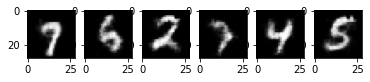

epoch[ 91 / 100 ], loss:0.1049
epoch[ 92 / 100 ], loss:0.1046
epoch[ 93 / 100 ], loss:0.1058
epoch[ 94 / 100 ], loss:0.0969
epoch[ 95 / 100 ], loss:0.1071
epoch[ 96 / 100 ], loss:0.1059
epoch[ 97 / 100 ], loss:0.1080
epoch[ 98 / 100 ], loss:0.1052
epoch[ 99 / 100 ], loss:0.1080
epoch[ 100 / 100 ], loss:0.1236


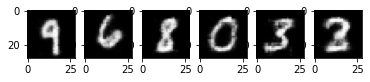

In [17]:
# 그래프 plot을 위한 리스트들
loss_y = []
loss_x = []
step = 0
for epoch in range(num_epochs):
  model.train()
  for data in dataloader:
    step+=1
    img, _ = data
    img = img.to(device)
    # 순방향 전파
    output = model(img)
    loss = criterion(output, img)
    loss_y.append(loss.item())
    loss_x.append(step)
    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # 한 epoch 마다 loss값 반환하기
  print('epoch[ {} / {} ], loss:{:.4f}'. format( epoch+1,num_epochs, loss.item() ) )
  if (epoch+1)%10 ==0:
    evaluate(data)

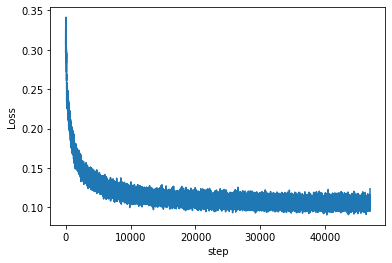

In [18]:
plt.plot(loss_x,loss_y)
plt.xlabel('step')
plt.ylabel('Loss')
plt.show()

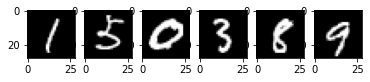

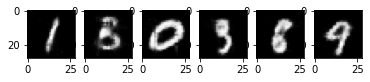

In [20]:
data = next(iter(dataloader))
img = data[0][:6]
imgshow(img)
evaluate(data)